In [1]:
import pandas as pd

In [2]:
testde= pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\camelsde_DEA11130.csv')

In [7]:
lstm_precip = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\y_sim.csv', parse_dates=[0])

In [11]:
lstm_precip

,Unnamed: 0,camelsde_DE110000,camelsde_DE110010,camelsde_DE110020,camelsde_DE110030,camelsde_DE110040,camelsde_DE110050,camelsde_DE110060,camelsde_DE110080,camelsde_DE110090,...,camelsde_DEG10520,camelsde_DEG10530,camelsde_DEG10540,camelsde_DEG10550,camelsde_DEG10560,camelsde_DEG10580,camelsde_DEG10590,camelsde_DEG10600,camelsde_DEG10610,camelsde_DEG10620
0,1980-01-01,1.168450,1.128624,1.060368,0.988965,0.870402,2.177168,0.571084,1.194905,1.167529,...,NaN,1.197020,0.741513,1.540540,0.909310,1.208157,1.053373,0.672802,3.540790,0.973203
1,1980-01-02,1.778803,1.574032,1.579805,1.762518,2.355195,2.500812,2.657490,1.906581,1.471275,...,NaN,1.284138,0.959690,2.306172,1.354861,1.066196,1.065895,1.174720,1.306963,1.557344
2,1980-01-03,1.154178,1.088942,0.774940,0.744234,0.910189,1.550839,1.095244,0.899033,0.755482,...,NaN,0.835325,0.661950,1.409036,0.689136,0.839492,0.710753,0.678470,0.695503,0.848839
3,1980-01-04,9.173282,8.592018,7.263832,6.641578,4.229558,13.177130,6.763777,3.333444,6.892550,...,NaN,0.824586,0.553051,1.030239,1.149933,1.703918,0.899440,1.045232,0.422137,1.420935
4,1980-01-05,8.462381,7.533415,5.194512,3.980794,6.833564,9.840274,10.985386,3.508015,3.311382,...,NaN,5.679422,2.796571,4.170181,2.143518,3.515668,3.609075,4.052100,3.392150,3.286880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14972,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14973,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14974,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
lstm_precip.columns

Index(['Unnamed: 0', 'camelsde_DE110000', 'camelsde_DE110010',
       'camelsde_DE110020', 'camelsde_DE110030', 'camelsde_DE110040',
       'camelsde_DE110050', 'camelsde_DE110060', 'camelsde_DE110080',
       'camelsde_DE110090',
       ...
       'camelsde_DEG10520', 'camelsde_DEG10530', 'camelsde_DEG10540',
       'camelsde_DEG10550', 'camelsde_DEG10560', 'camelsde_DEG10580',
       'camelsde_DEG10590', 'camelsde_DEG10600', 'camelsde_DEG10610',
       'camelsde_DEG10620'],
      dtype='object', length=1888)

In [10]:
# Ensure the date columns are in datetime format
testde['date'] = pd.to_datetime(testde['date'])
lstm_precip['Unnamed: 0'] = pd.to_datetime(lstm_precip['Unnamed: 0'])

In [12]:

# Merge the two dataframes on the date columns
# Use 'left' join to keep all rows from testde and get matching values from lstm_precip
merged_df = pd.merge(testde, lstm_precip[['Unnamed: 0', 'camelsde_DEA11130']],
                     left_on='date', right_on='Unnamed: 0', how='left')

# Now 'testde_2' from lstm_precip is copied to the merged_df, but only for matching dates
# Drop the 'Unnamed: 0' column as it's no longer needed
merged_df = merged_df.drop(columns=['Unnamed: 0'])

# The result is 'merged_df' where 'testde_2' is copied from lstm_precip to testde
print(merged_df.head())


        date  snow_depth_water_equivalent_mean  \
0 1951-01-01                             22.84   
1 1951-01-02                             23.12   
2 1951-01-03                             23.81   
3 1951-01-04                             23.77   
4 1951-01-05                             19.05   

   surface_net_solar_radiation_mean  surface_net_thermal_radiation_mean  \
0                              7.99                              -25.20   
1                             12.50                              -37.46   
2                             12.31                              -29.44   
3                             15.69                              -23.60   
4                              5.79                               -8.13   

   surface_pressure_mean  temperature_2m_mean  dewpoint_temperature_2m_mean  \
0                  97.34                -0.66                         -2.69   
1                  96.94                 0.96                         -0.78   
2          

In [13]:
output_file_path = r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_4.csv' # Replace with your desired path
merged_df.to_csv(output_file_path, index=False)

In [14]:
import pandas as pd

# Define the date range
date_start = '1980-01-01'
date_end = '2020-12-31'

# Read the existing timeseries data
timeseries = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_4.csv')

# Convert 'date' column to datetime
timeseries['date'] = pd.to_datetime(timeseries['date'])

# Read evapotranspiration data from CSV files and convert 'date' columns
evap_lstm = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_lstm_r1.csv',header=None)
evap_era5 = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_era5_r1.csv',header=None)

In [19]:
import pandas as pd

# Define the date range
date_start = '1980-01-01'
date_end = '2020-12-31'

# Read the existing timeseries data
timeseries = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_4.csv')

# Convert 'date' column to datetime
timeseries['date'] = pd.to_datetime(timeseries['date'])

# Read evapotranspiration data from CSV files and convert 'date' columns
evap_lstm = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_lstm_r1.csv')
evap_era5 = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_era5_r1.csv')

# Create a date range based on the length of the timeseries
date_range = pd.date_range(start=date_start, end=date_end)

# Add date information to each evap DataFrame
evap_lstm['date'] = date_range[:len(evap_lstm)]
evap_era5['date'] = date_range[:len(evap_era5)]

# Merge each evap dataset with the timeseries data based on the 'date' column
timeseries = pd.merge(timeseries, evap_lstm[['date', 'evap_lstm_column']], on='date', how='left')
timeseries = pd.merge(timeseries, evap_era5[['date', 'evap_era5_column']], on='date', how='left')

# Save the updated timeseries data to a new CSV file
timeseries.to_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_5.csv', index=False)


In [18]:
date_range

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=14976, freq='D')

<Axes: >

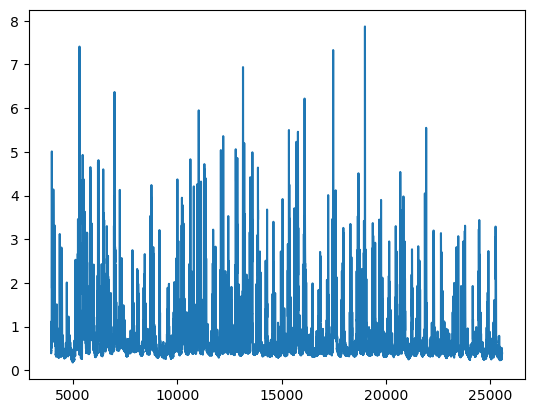

In [22]:
timeseries['streamflow'].plot()

In [23]:
# Save the updated timeseries data to a new CSV file
timeseries.to_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_5.csv', index=False)

<Axes: >

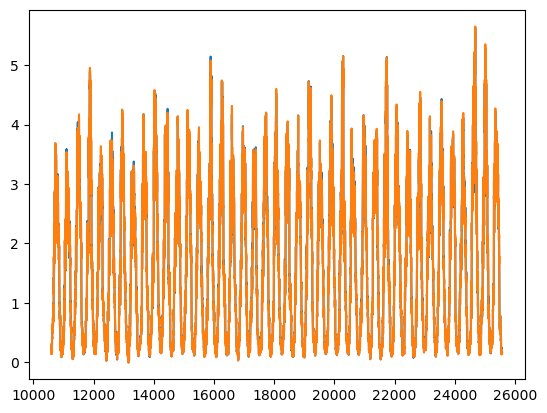

In [25]:
timeseries['evap_lstm_column'].plot()
timeseries['evap_era5_column'].plot()